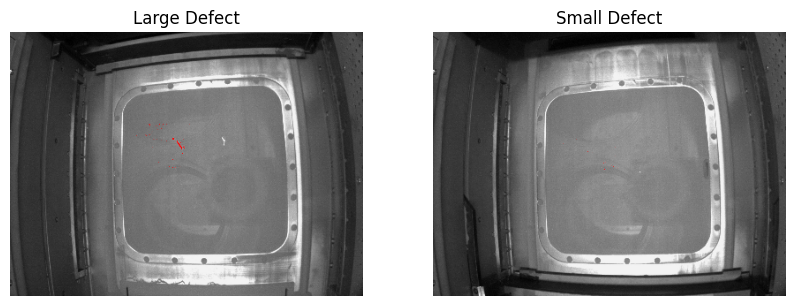

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
base_image = cv2.imread('base.png')
large_defect_image = cv2.imread('large.png')
small_defect_image = cv2.imread('small.png')

# Check if images are loaded successfully
if base_image is None or large_defect_image is None or small_defect_image is None:
    print("Error: One or more images failed to load.")
    exit()

# Convert images to grayscale for analysis
gray_base = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
gray_large_defect = cv2.cvtColor(large_defect_image, cv2.COLOR_BGR2GRAY)
gray_small_defect = cv2.cvtColor(small_defect_image, cv2.COLOR_BGR2GRAY)

# Define a region of interest (ROI) around the center of the image
height, width = gray_base.shape
roi_width = int(width * 0.2)
roi_height = int(height * 0.2)
roi_x = int((width - roi_width) / 2)
roi_y = int((height - roi_height) / 2)

# Compute absolute difference between base and defect images within the ROI
diff_large_defect_roi = cv2.absdiff(gray_base[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width],
                                     gray_large_defect[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width])
diff_small_defect_roi = cv2.absdiff(gray_base[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width],
                                     gray_small_defect[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width])

# Threshold the difference images within the ROI to get binary images of defects
_, thresh_large_defect_roi = cv2.threshold(diff_large_defect_roi, 30, 255, cv2.THRESH_BINARY)
_, thresh_small_defect_roi = cv2.threshold(diff_small_defect_roi, 30, 255, cv2.THRESH_BINARY)

# Highlight defects in the original images within the ROI
large_defect_highlighted = large_defect_image.copy()
small_defect_highlighted = small_defect_image.copy()
large_defect_highlighted[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width][thresh_large_defect_roi == 255] = [0, 0, 255]  # Highlight in red
small_defect_highlighted[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width][thresh_small_defect_roi == 255] = [0, 0, 255]  # Highlight in red

# Resize output images to a specific size
output_size = (400, 300)  # Set the desired output size
large_defect_highlighted_resized = cv2.resize(large_defect_highlighted, output_size)
small_defect_highlighted_resized = cv2.resize(small_defect_highlighted, output_size)

# Display the images side by side in the same line
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(large_defect_highlighted_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Large Defect')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(small_defect_highlighted_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Small Defect')

plt.show()
